> ### preparation

In [ ]:
import torch
import matplotlib.pyplot as plt
sig = torch.nn.Sigmoid()
tanh = torch.nn.Tanh()
soft = torch.nn.Softmax(dim=1)

def f(txt,mapping):
    return [mapping[key] for key in txt] 


txt = list('hi?hello!!')*100 
txt_x = txt[:-1]
txt_y = txt[1:]

x = torch.tensor(f(txt_x,{'h':0,'i':1,'e':2,'l':3,'o':4,'?':5,'!':6}))
y = torch.tensor(f(txt_y,{'h':0,'i':1,'e':2,'l':3,'o':4,'?':5,'!':6}))

x= torch.nn.functional.one_hot(x).float().to("cuda:0")
y= torch.nn.functional.one_hot(y).float().to("cuda:0")

-----

> ###  (1)

In [ ]:
rnn = torch.nn.RNN(7,8).to("cuda:0") 
cook = torch.nn.Linear(8,7).to("cuda:0")

In [ ]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(list(rnn.parameters())+list(cook.parameters()))

In [ ]:
_water = torch.zeros(1,8).to("cuda:0")
for epoc in range(5000):
    hidden,hT = rnn(x,_water) 
    output = cook(hidden)
    loss = loss_fn(output,y) 
    loss.backward()
    optimizr.step()
    optimizr.zero_grad()

In [ ]:
yhat = soft(output).data.to("cpu")

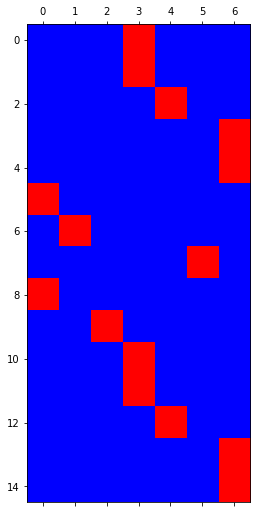

In [ ]:
plt.matshow(yhat[-15:].data,cmap='bwr')

> ### (2)

In [ ]:
txt = list('hi?hello!!')*100 
txt_x = txt[:-1]
txt_y = txt[1:]

x = torch.tensor(f(txt_x,{'h':0,'i':1,'e':2,'l':3,'o':4,'?':5,'!':6}))
y = torch.tensor(f(txt_y,{'h':0,'i':1,'e':2,'l':3,'o':4,'?':5,'!':6}))

x= torch.nn.functional.one_hot(x).float()
y= torch.nn.functional.one_hot(y).float()

In [ ]:
rnncell = torch.nn.RNNCell(7,8)

In [ ]:
cook = torch.nn.Linear(8,7)

In [ ]:
loss_fn = torch.nn.CrossEntropyLoss() 
optimizr = torch.optim.Adam(list(rnncell.parameters())+list(cook.parameters()),lr=0.1)

In [ ]:
T = len(x) 
for epoc in range(500):
    loss = 0 
    ht = torch.zeros(1,8)
    for t in range(T):
        xt,yt = x[[t]], y[[t]]
        ht = rnncell(xt,ht) 
        ot = cook(ht) 
        loss = loss + loss_fn(ot,yt)
    loss.backward()
    optimizr.step()
    optimizr.zero_grad()

In [ ]:
T = len(x) 
hidden = torch.zeros(T,8)
_water = torch.zeros(1,8)
hidden[[0]] = rnncell(x[[0]],_water) 
for t in range(1,T):
    hidden[[t]] = rnncell(x[[t]],hidden[[t-1]]) 

In [ ]:
yhat = soft(cook(hidden))

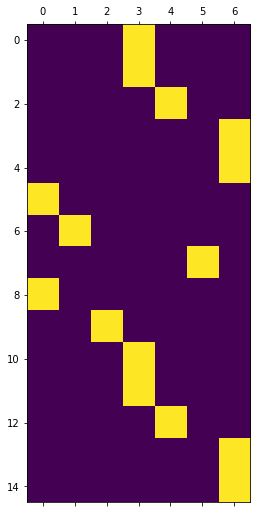

In [ ]:
plt.matshow(yhat.data[-15:])

> ### (3)

In [ ]:
class rNNCell(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.i2h = torch.nn.Linear(7,8)
        self.h2h = torch.nn.Linear(8,8)
        self.tanh = torch.nn.Tanh()
    def forward(self,x,ht):
        ht = self.tanh(self.i2h(x)+self.h2h(ht))
        return ht

_rnncell = rNNCell()

In [ ]:
_rnncell.i2h.weight.data = rnncell.weight_ih.data
_rnncell.h2h.weight.data = rnncell.weight_hh.data
_rnncell.h2h.bias.data = rnncell.bias_hh.data
_rnncell.i2h.bias.data = rnncell.bias_ih.data

In [ ]:
cook = torch.nn.Linear(8,7)

In [ ]:
loss_fn = torch.nn.CrossEntropyLoss() 
optimizr = torch.optim.Adam(list(_rnncell.parameters())+list(cook.parameters()),lr=0.1)

In [ ]:
T = len(x) 
for epoc in range(500): 
    loss = 0 
    ht = torch.zeros(1,8)
    for t in range(T):
        xt,yt = x[[t]], y[[t]]
        ht = _rnncell(xt,ht) 
        ot = cook(ht)
        loss = loss + loss_fn(ot,yt) 
    loss.backward()
    optimizr.step()
    optimizr.zero_grad()

In [ ]:
T = len(x) 
hidden = torch.zeros(T,8)
_water = torch.zeros(1,8)
hidden[[0]] = _rnncell(x[[0]],_water) 
for t in range(1,T):
    hidden[[t]] = _rnncell(x[[t]],hidden[[t-1]]) 

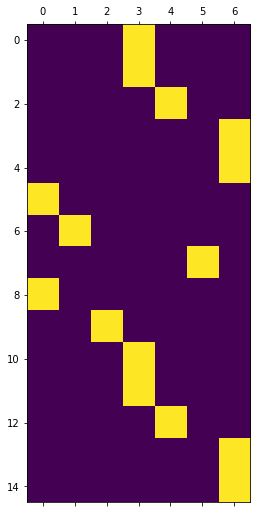

In [ ]:
yhat = soft(cook(hidden))
plt.matshow(yhat.data[-15:])

> ### (4)

In [ ]:
txt = list('hi?hello!!')*100 
txt_x = txt[:-1]
txt_y = txt[1:]

x = torch.tensor(f(txt_x,{'h':0,'i':1,'e':2,'l':3,'o':4,'?':5,'!':6}))
y = torch.tensor(f(txt_y,{'h':0,'i':1,'e':2,'l':3,'o':4,'?':5,'!':6}))

x= torch.nn.functional.one_hot(x).float().to("cuda:0")
y= torch.nn.functional.one_hot(y).float().to("cuda:0")

In [ ]:
lstm = torch.nn.LSTM(7,4).to("cuda:0")
linr = torch.nn.Linear(4,7).to("cuda:0")
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(list(lstm.parameters())+ list(linr.parameters()),lr=0.1)

In [ ]:
for epoc in range(500):
    _water = torch.zeros(1,4).to("cuda:0")
    hidden, (hT,cT) = lstm(x,(_water,_water)) 
    output = linr(hidden) 
    loss = loss_fn(output,y) 
    loss.backward()
    optimizr.step()
    optimizr.zero_grad()

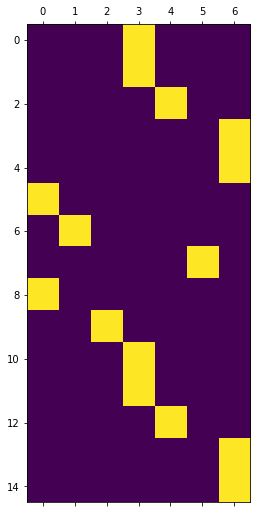

In [ ]:
yhat = soft(output).data.to("cpu")
plt.matshow(yhat.data[-15:])

> ### (5)

In [ ]:
txt = list('hi?hello!!')*100 
txt_x = txt[:-1]
txt_y = txt[1:]

x = torch.tensor(f(txt_x,{'h':0,'i':1,'e':2,'l':3,'o':4,'?':5,'!':6}))
y = torch.tensor(f(txt_y,{'h':0,'i':1,'e':2,'l':3,'o':4,'?':5,'!':6}))

x= torch.nn.functional.one_hot(x).float()
y= torch.nn.functional.one_hot(y).float()

In [ ]:
lstm_cell = torch.nn.LSTMCell(7,4)
linr = torch.nn.Linear(4,7)
loss_fn = torch.nn.CrossEntropyLoss() 
optimizr = torch.optim.Adam(list(lstm_cell.parameters())+list(linr.parameters()),lr=0.1)

In [ ]:
T = len(x) 
for epoc in range(500):
    ht = torch.zeros(1,4)
    ct = torch.zeros(1,4)
    loss = 0 
    for t in range(T):
        xt,yt = x[[t]], y[[t]]
        ht,ct = lstm_cell(xt,(ht,ct))
        ot = linr(ht)
        loss = loss + loss_fn(ot,yt)
    loss = loss / T 
    loss.backward()
    optimizr.step()
    optimizr.zero_grad()

In [ ]:
T = len(x) 
_water = torch.zeros(1,4)
ht = torch.zeros(T,4)
ct = torch.zeros(T,4)
ht[[0]],ct[[0]]= lstm_cell(x[[0]],(_water,_water)) 
for t in range(1,T):
    ht[[t]],ct[[t]] = lstm_cell(x[[t]],(ht[[t-1]],ct[[t-1]])) 

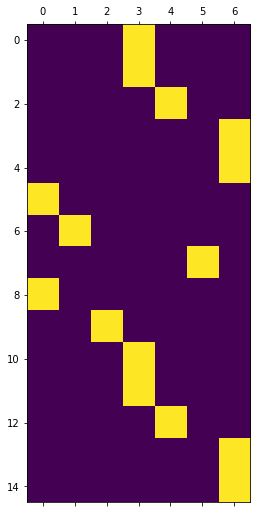

In [ ]:
yhat = soft(linr(ht))
plt.matshow(yhat.data[-15:])

> ### (6)

In [ ]:
optimizr = torch.optim.Adam(list(lstm_cell.parameters())+list(linr.parameters()),lr=0.1)

In [ ]:
T = len(x) 
for epoc in range(500):
    ht = torch.zeros(1,4)
    ct = torch.zeros(1,4)
    loss = 0 
    for t in range(T):
        xt,yt = x[[t]], y[[t]]
        
        _ifgo = xt @ lstm_cell.weight_ih.T + ht @ lstm_cell.weight_hh.T + lstm_cell.bias_ih + lstm_cell.bias_hh
        
        input_gate = sig(_ifgo[:,0:4])
        forget_gate = sig(_ifgo[:,4:8])
        gt = tanh(_ifgo[:,8:12])
        output_gate = sig(_ifgo[:,12:16])
        
        ct = forget_gate * ct + input_gate * gt
        ht = output_gate * tanh(ct)
        
        ot = linr(ht)
        loss = loss + loss_fn(ot,yt)
    loss = loss / T
        
    loss.backward()
        
    optimizr.step()
    optimizr.zero_grad()

-------------------------------------------------------------------------

> # 2

- 1)
  - 참
- 2)
  - 참
- 3)
  - 참
- 4)
  - 거짓
- 5)
  - 거짓